In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,NaN,4.0,4.0,3.0,2.0,7.0,8.0,2.0,NaN,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,NaN,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,NaN,2.0,8.0,2.0,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,10.0,5.0,NaN,3.0,4.0,10.0,7.0,8.0,NaN,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,NaN,4.0,NaN,NaN,0.0,7.0,0.0,8.0,NaN,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2250
float64		column 2	1500
float64		column 3	1750
float64		column 4	2750
float64		column 5	1000
float64		column 6	2250
float64		column 7	2000
float64		column 8	1750
float64		column 9	3250
float64		column 10	2000
float64		column 11	1750
float64		column 12	2750
float64		column 13	1250
float64		column 14	3000
float64		column 15	1750
float64		column 16	1000
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,17750.000000,18500.000000,18250.000000,17250.000000,19000.000000,17750.000000,18000.000000,18250.000000,16750.000000,18000.000000,18250.000000,17250.000000,18750.000000,17000.000000,18250.000000,19000.000000,0.0
mean,4.008845,7.046865,5.115616,5.380638,3.493053,6.911944,7.495278,4.611288,5.156000,8.253333,6.442685,7.927710,3.022240,8.318941,3.674795,7.803895,NaN
std,1.834336,3.236221,1.958248,2.151364,2.155601,1.944282,2.236423,2.616547,2.241487,2.404008,2.544304,1.967043,2.283657,1.449844,2.495729,1.587945,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

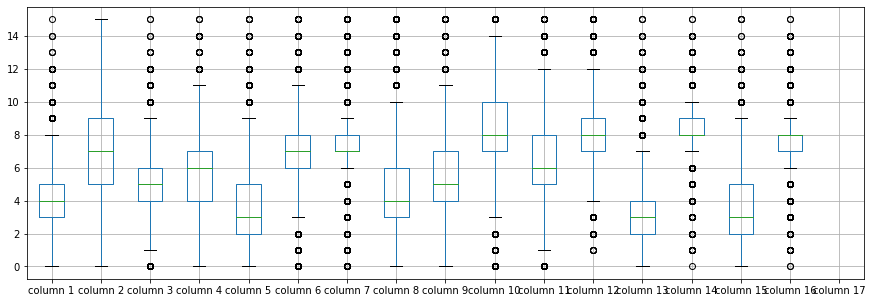

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.008845
column 2     7.046865
column 3     5.115616
column 4     5.380638
column 5     3.493053
column 6     6.911944
column 7     7.495278
column 8     4.611288
column 9     5.156000
column 10    8.253333
column 11    6.442685
column 12    7.927710
column 13    3.022240
column 14    8.318941
column 15    3.674795
column 16    7.803895
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.738661,0.837828,0.646946,0.603950,-0.024361,0.041918,0.015530,0.040323,0.147806,0.033191,-0.044264,0.471778,0.095530,0.260915,-0.096420,NaN
column 2,0.738661,1.000000,0.654749,0.809817,0.542961,0.040823,-0.032942,-0.020652,0.086772,0.156484,-0.051813,-0.010464,0.272352,0.003591,0.219737,-0.039770,NaN
column 3,0.837828,0.654749,1.000000,0.635682,0.754141,0.060131,0.021957,-0.100376,0.049560,0.120836,0.007190,-0.045465,0.542631,0.045313,0.246543,-0.109541,NaN
column 4,0.646946,0.809817,0.635682,1.000000,0.622226,0.032593,-0.009020,0.078412,0.055045,0.016406,-0.006610,0.016607,0.254647,0.025074,0.278191,-0.018745,NaN
column 5,0.603950,0.542961,0.754141,0.622226,1.000000,0.132449,-0.029530,-0.012097,-0.059990,-0.065096,-0.067928,-0.040079,0.616465,0.013495,0.474193,-0.065488,NaN
column 6,-0.024361,0.040823,0.060131,0.032593,0.132449,1.000000,-0.347878,-0.048016,-0.116722,0.075706,-0.335487,-0.037161,0.134243,-0.235405,0.123733,0.228551,NaN
column 7,0.041918,-0.032942,0.021957,-0.009020,-0.029530,-0.347878,1.000000,-0.110025,-0.047641,0.159620,0.577091,-0.243452,-0.035291,0.517656,-0.078095,-0.200720,NaN
column 8,0.015530,-0.020652,-0.100376,0.078412,-0.012097,-0.048016,-0.110025,1.000000,-0.168698,-0.307677,0.028679,0.074880,0.128041,-0.066177,0.013942,0.177961,NaN
column 9,0.040323,0.086772,0.049560,0.055045,-0.059990,-0.116722,-0.047641,-0.168698,1.000000,0.118059,-0.059324,0.102507,-0.354311,-0.045562,0.251898,-0.054790,NaN
column 10,0.147806,0.156484,0.120836,0.016406,-0.065096,0.075706,0.159620,-0.307677,0.118059,1.000000,0.050651,-0.103480,-0.166978,0.034671,-0.078717,-0.110223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+6,17+6+6,17+6+6+6,17+6+6,17+6,17], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.1026438079834
Epoch: 1 , loss: 45.220156369018554
Epoch: 2 , loss: 42.19214666748047
Epoch: 3 , loss: 40.857703927612306
Epoch: 4 , loss: 39.97413021087647
Epoch: 5 , loss: 39.35482400512695
Epoch: 6 , loss: 39.02430155944824
Epoch: 7 , loss: 38.61181335601807
Epoch: 8 , loss: 38.423737173461916
Epoch: 9 , loss: 38.255837371826175
Epoch: 10 , loss: 38.041082508850096
Epoch: 11 , loss: 37.81365782012939
Epoch: 12 , loss: 37.61960690612793
Epoch: 13 , loss: 37.56168220520019
Epoch: 14 , loss: 37.45631503448487
Epoch: 15 , loss: 37.39759674835205
Epoch: 16 , loss: 37.21599596710205
Epoch: 17 , loss: 37.1494912689209
Epoch: 18 , loss: 37.20528146820068
Epoch: 19 , loss: 37.07890200042725
Epoch: 20 , loss: 36.87946818695068
Epoch: 21 , loss: 36.789506169128416
Epoch: 22 , loss: 36.848533604431154
Epoch: 23 , loss: 36.74241189575195
Epoch: 24 , loss: 36.689368690490724
Epoch: 25 , loss: 36.7539210357666
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     2.929781
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    5.626181
column 15    2.595554
column 16    8.000000
column 17   -0.001439
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.759604,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,-5.310992,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.0,0.00000,-0.597714,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
2,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-6.733333,0.000000,0.0,0.0,-0.659025,0.000000,0.000000,NaN
3,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.049160,0.000000,0.0,-1.34598,0.000000,0.0,0.000000,0.000000,0.000000,-2.146255,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
19996,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
19997,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
19998,0.000000,0.000000,0.0,0.00000,0.000000,0.0,5.121937,0.000000,-1.102609,6.793306,0.000000,0.0,0.0,0.000000,3.542424,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

570.9839933194547

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.15292235350781852

In [19]:
new_df.iloc[66,:]

column 1      3.044033
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6      5.703885
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     2.813733
column 16     7.000000
column 17     0.000318
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.759604,4.000000,4.0,3.00000,2.000000,7.0,8.000000,2.000000,3.689008,11.000000,7.000000,7.0,1.0,8.000000,5.000000,6.000000,-0.004594
1,4.000000,7.000000,5.0,5.00000,4.402286,5.0,9.000000,6.000000,4.000000,8.000000,7.000000,9.0,2.0,9.000000,7.000000,10.000000,0.000642
2,7.000000,10.000000,8.0,7.00000,4.000000,8.0,8.000000,5.000000,10.000000,4.266667,2.000000,8.0,2.0,4.340975,5.000000,10.000000,0.000311
3,4.000000,9.000000,5.0,7.00000,4.000000,7.0,7.000000,13.000000,1.000000,7.000000,6.000000,8.0,3.0,8.000000,0.000000,8.000000,0.001425
4,6.000000,7.000000,8.0,5.00000,4.000000,7.0,6.000000,3.000000,7.000000,10.000000,7.000000,9.0,3.0,8.000000,3.000000,7.000000,-0.003020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.950840,10.000000,5.0,6.65402,3.000000,4.0,10.000000,7.000000,8.000000,9.853745,10.000000,9.0,2.0,9.000000,2.000000,6.000000,0.002006
19996,4.000000,7.000000,6.0,5.00000,3.000000,7.0,8.000000,2.000000,10.000000,12.000000,6.000000,8.0,1.0,9.000000,6.000000,8.000000,-0.002025
19997,4.000000,8.000000,4.0,6.00000,4.000000,7.0,8.000000,7.000000,4.000000,10.000000,7.000000,6.0,3.0,9.000000,3.000000,7.000000,-0.001828
19998,4.000000,11.000000,4.0,8.00000,3.000000,0.0,7.121937,4.000000,4.897391,7.793306,0.000000,7.0,0.0,8.000000,3.542424,8.000000,0.001767


In [21]:
imputations[-1].to_excel("Letter_NL_10(imp).xlsx", index=False, header=False)